# Import the data

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn_extra.cluster import KMedoids
import seaborn as sns

In [65]:
d = pd.read_csv('winequality-red.csv')
x = d.drop(["quality"], axis=1)

In [66]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [67]:
dictionary = {"fixed_acidity":x.fixed_acidity.values,"volatile_acidity":x.volatile_acidity.values}
              
data = pd.DataFrame(dictionary)
data.head()

,fixed_acidity,volatile_acidity
0,7.4,0.70
1,7.8,0.88
2,7.8,0.76
3,11.2,0.28
4,7.4,0.70


# Data Visualization

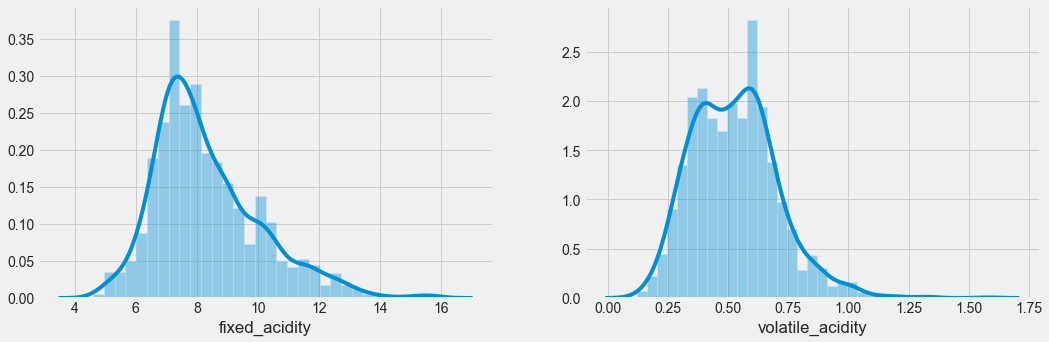

In [68]:
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

plt.figure(figsize = (16,5))

plt.subplot(1, 2, 1)
sns.distplot(data['fixed_acidity'])

plt.subplot(1, 2, 2)
sns.distplot(data['volatile_acidity'])

plt.show()

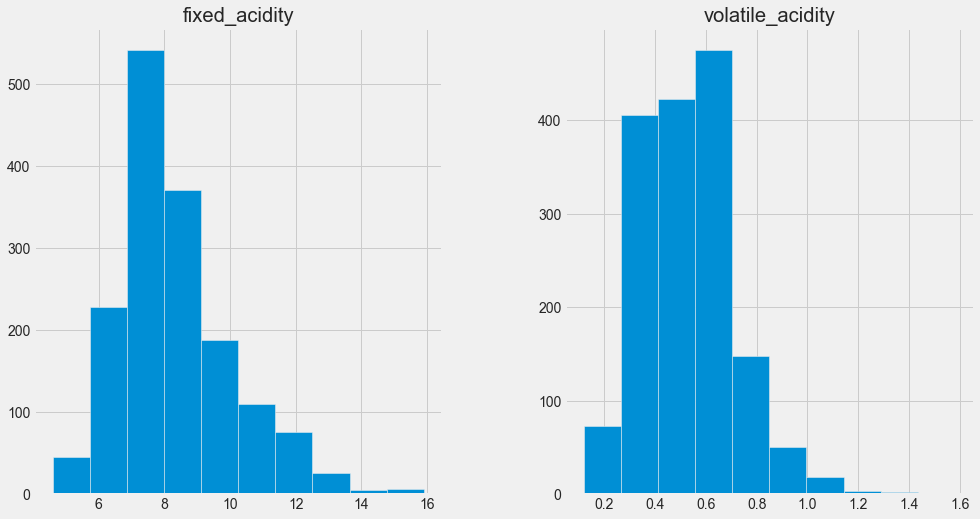

In [69]:
data.hist(figsize = (15, 8))
plt.show()

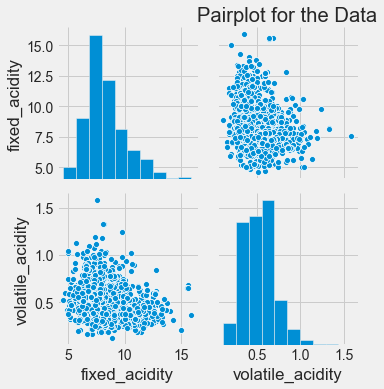

In [70]:
sns.pairplot(data)
plt.title('Pairplot for the Data')
plt.show()

Text(0.5, 1.0, 'Distribution of fixed_acidity')

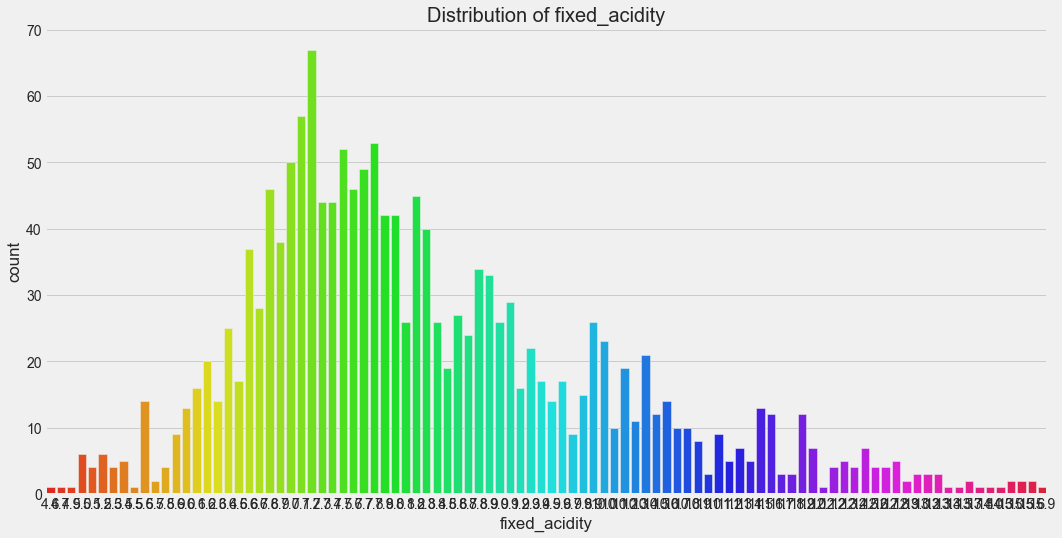

In [71]:
plt.figure(figsize = (16,8))
sns.countplot(data['fixed_acidity'], palette = 'hsv')
plt.title('Distribution of fixed_acidity', fontsize = 20)

Text(0.5, 1.0, 'Distribution of volatile_acidity')

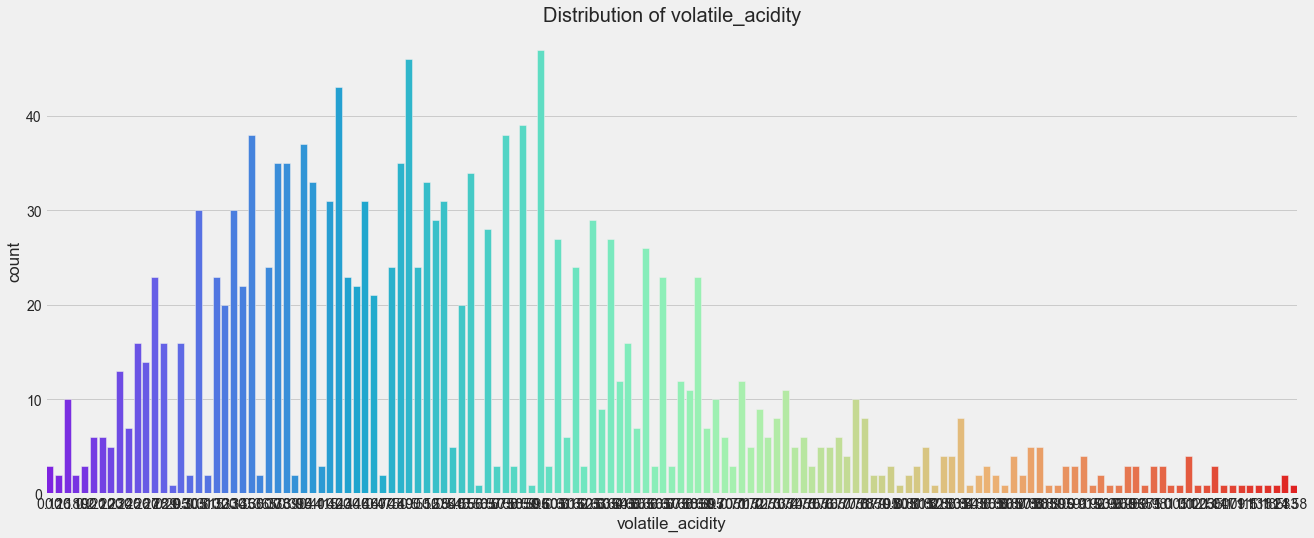

In [72]:
plt.figure(figsize = (20,8))
sns.countplot(data['volatile_acidity'], palette = 'rainbow')
plt.title('Distribution of volatile_acidity', fontsize = 20)

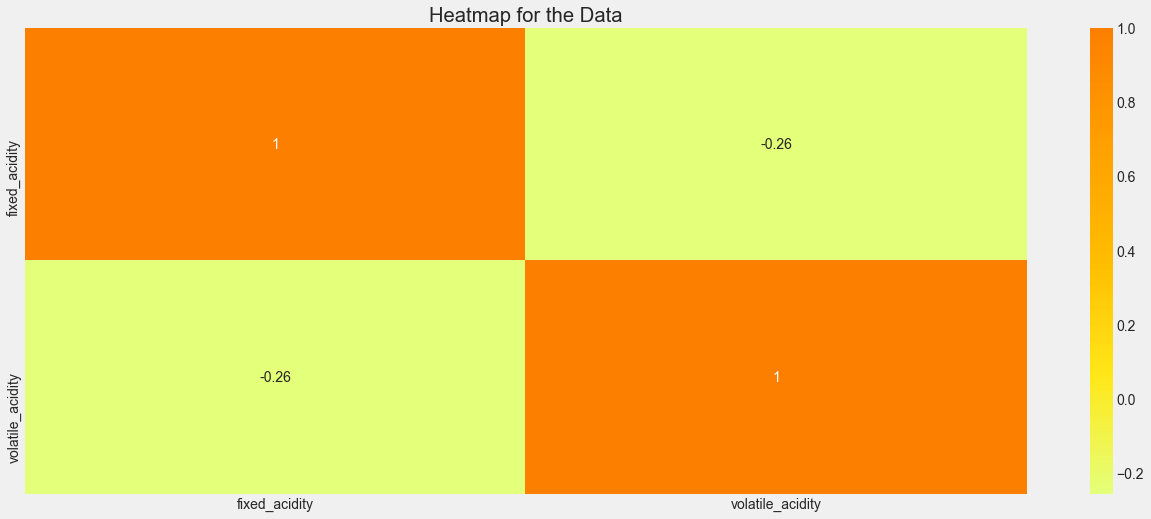

In [73]:
plt.figure(figsize = (20,8))
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data')
plt.show()

# K-Medoid

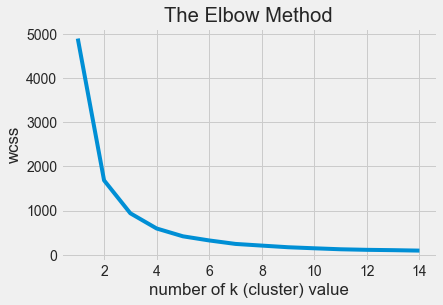

In [74]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

# k = 3 icin modelim

In [75]:
data2 = np.array(data)

In [76]:
kmedoids = KMedoids(n_clusters=3,metric="manhattan",init="random",random_state=100)

In [77]:
kmedoids2= kmedoids.fit_predict(data2)

In [78]:
kmedoids.medoid_indices_

array([ 434,  417, 1139])

In [79]:
kmedoids.cluster_centers_

array([[10.4 ,  0.41],
       [ 7.  ,  0.58],
       [ 8.2 ,  0.51]])

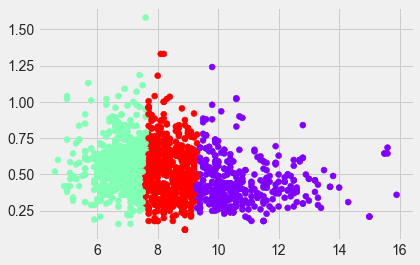

In [80]:
plt.scatter(data2[:,0],data2[:,1],c=kmedoids.labels_,cmap='rainbow')

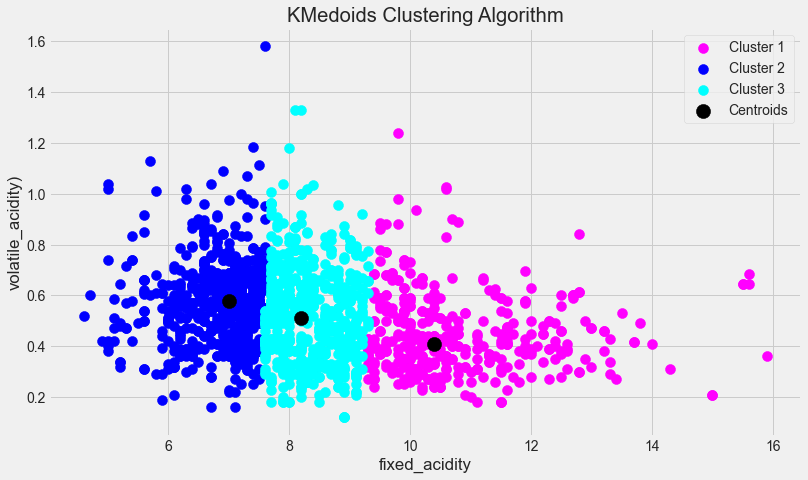

In [81]:
plt.figure(1 , figsize = (12 , 7))

plt.scatter(data2[kmedoids2 == 0, 0], data2[kmedoids2 == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1') ### Cluster 1
plt.scatter(data2[kmedoids2 == 1, 0], data2[kmedoids2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')  ## Cluster 2
plt.scatter(data2[kmedoids2 == 2, 0], data2[kmedoids2 == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')  ## Cluster 3

plt.scatter(kmedoids.cluster_centers_[:, 0],kmedoids.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('KMedoids Clustering Algorithm')
plt.xlabel('fixed_acidity')
plt.ylabel('volatile_acidity)')
plt.legend()
plt.show()

# Hierarchial Clustering

In [82]:
import scipy.cluster.hierarchy as sch

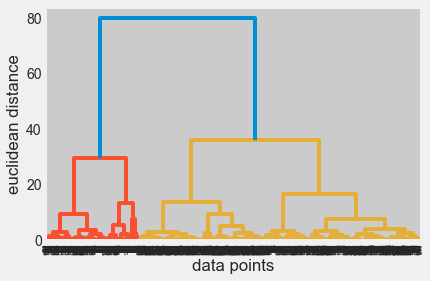

In [83]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data2,method="ward")
dendrogram(merg)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [84]:
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
cluster=hiyerartical_cluster.fit_predict(data2)


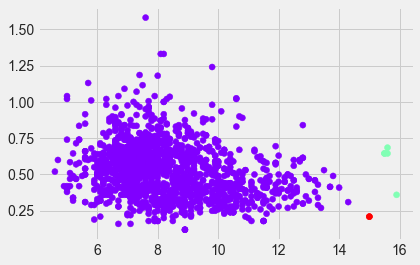

In [85]:
plt.scatter(data2[:,0],data2[:,1],c = hiyerartical_cluster.labels_,cmap='rainbow')